In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df=pd.read_csv(r"C:\Users\KIIT\Downloads\insurance.csv")

# EDA

In [75]:
## printing the top 5 columns
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [76]:
df.shape

(1338, 7)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


thus the dataset does not contain any null values

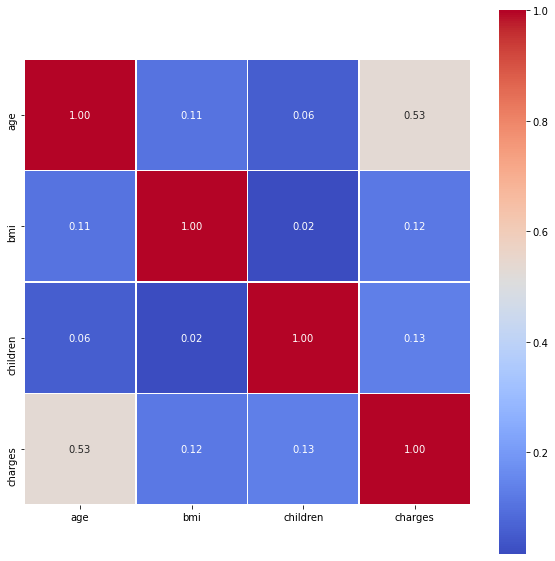

In [78]:
## plotting the correlation between the columns to detect a pattern betwween them.

plt.figure(figsize=(10,10))
corr = df.corr(method='spearman')
ax = sns.heatmap(corr, square=True, linewidths=.5, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

from the correlation plot it can be seen that the 'charges' and the 'age' have higher correlation with each other compared to the other coulmns.

[]

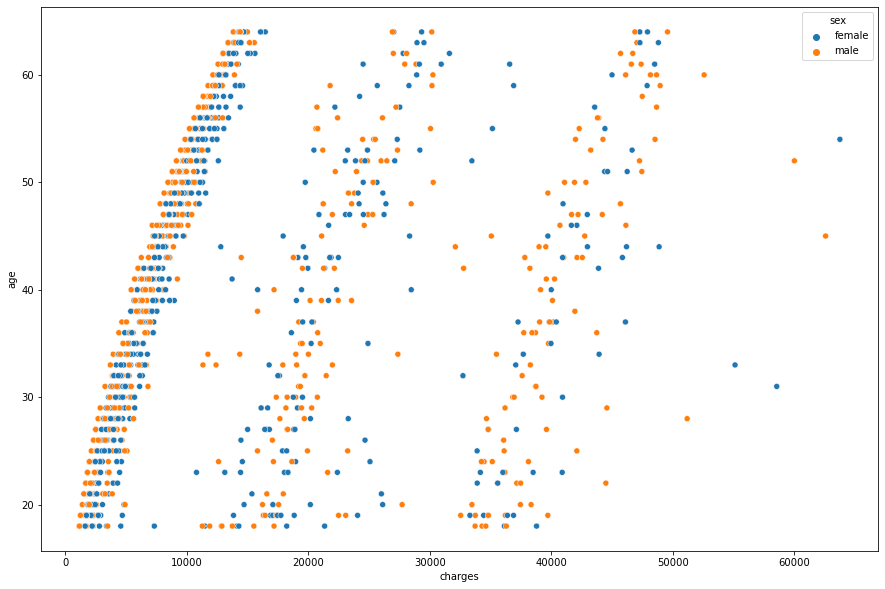

In [79]:
## as the "age and the "charges" have a higher correlation we will plot the other garphs with accordace to the age 
## and the charges

##now lets check if "sex" has any relation with the "age" and the "price charged"

plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="charges", y="age", hue="sex", data=df)
ax.plot()

so from the plot it can be observed that there is a basic trend that the price charged increases with the increase in the age 

but the plot is divided into three groups (0-15k),(15k-30k),(35k-45k).
Hence the age affects the price  heavily.
  

[]

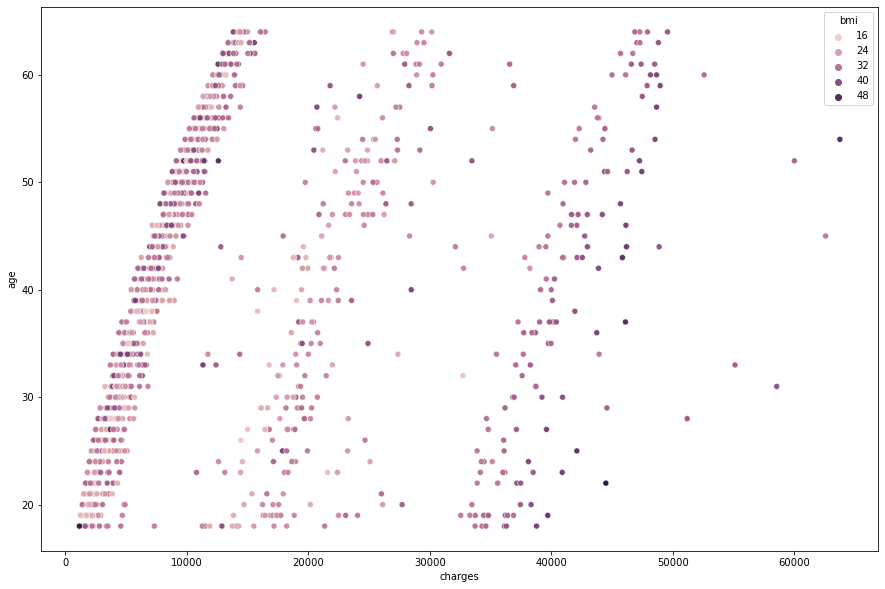

In [80]:
# checking if bmi has relation with age and price charge

plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="charges", y="age", hue="bmi", data=df)
ax.plot()

it seems that the bmi only affects the price charge on the higher price area. this means that the people with higher bmi 
supposed to have higher insurace charges.

but still it does not seem to affect much .

[]

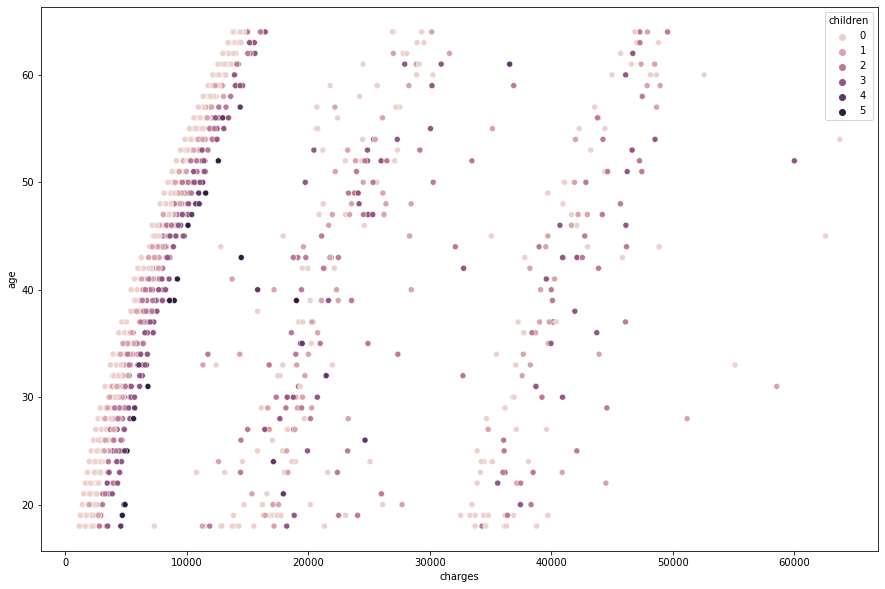

In [81]:
# Explore if there seem to be any relation between age and children with price charged
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="charges", y="age", hue="children", data=df)
ax.plot()

There seems no strong relation of children with charges.

[]

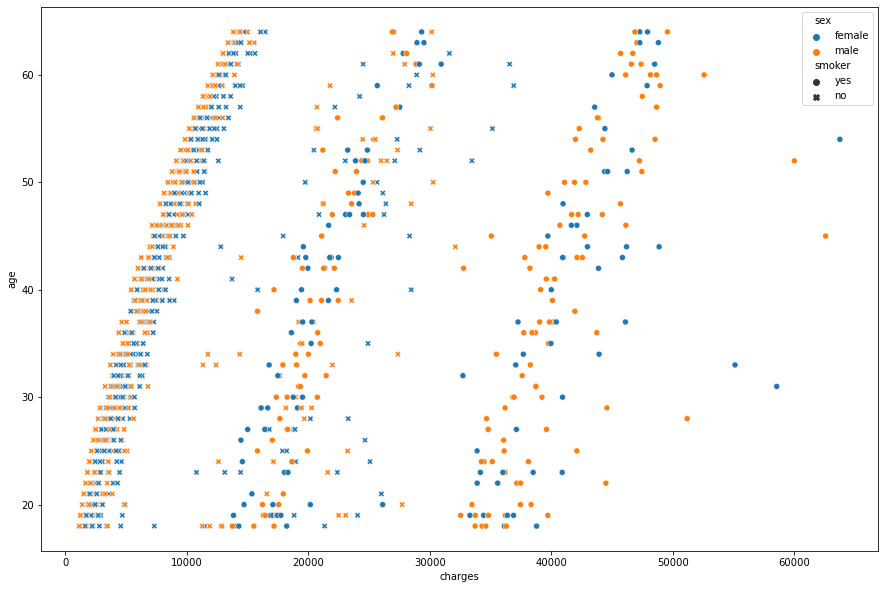

In [82]:
## checking if smoking has relation with the above plot

plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="charges", y="age", hue="sex", style="smoker", data=df)
ax.plot()

hence from the plot it is evident that the 1st group is basically the group of smokers .  the next two groups have relatively less smokers and the final group has no smokers at all.

hence the smoking seems to have a very strong relation with the insurance charge.

[]

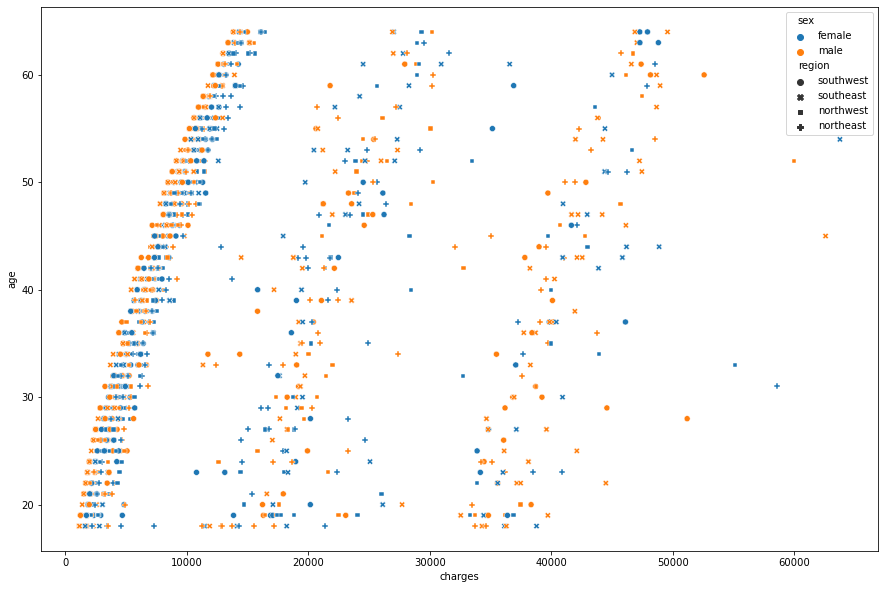

In [83]:
## checking if region has relation with the above plot

plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="charges", y="age", hue="sex", style="region", data=df)
ax.plot()

nothing can be concluded from this plot . hence the region has nothing to do with the insurance price charge

# Hence the age and smokers seems to have the highest affect on the insurance charge. All other factors doesnot  affect the insurace charge that much.

# encoding

now converting the object data to numerical data using one hot encoding

In [84]:
one_data= pd.get_dummies(df,columns=["sex", "region", "smoker"])

In [88]:
one_data.head()

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0,1,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0,1,0


# splitting

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
# Seperate data into features/X and label/Y
X = one_data.drop("charges",axis=1)
y = one_data["charges"]

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# different models 

In [116]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [117]:
## linear regreesion
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
pred = lr_model.predict(X_test)
error = mae(pred, y_test)
print('MAE of Linear Regression is: {:,.0f}'.format(error))

## DecisionTree
dt_model = DecisionTreeRegressor(max_leaf_nodes=900, random_state=1)
dt_model.fit(X_train, y_train)
pred = dt_model.predict(X_test)
error = mae(pred, y_test)
print('MAE of Decision Tree is: {:,.0f}'.format(error))

## RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)
error = mae(pred, y_test)
print('MAE of Random Forest is: {:,.0f}'.format(error))


MAE of Linear Regression is: 4,011
MAE of Decision Tree is: 3,241
MAE of Random Forest is: 2,840


In [118]:
print(f"Linear Regression Model Accuray: {(lr_model.score(X_test, y_test)*100):.2f}")
print(f"Decision Tree Model Accuray: {(dt_model.score(X_test, y_test)*100):.2f}")
print(f"Random Forest Model Accuray: {(rf_model.score(X_test, y_test)*100):.2f}")


Linear Regression Model Accuray: 79.09
Decision Tree Model Accuray: 70.27
Random Forest Model Accuray: 85.83


# Hence the best moel found is Random Forest Model with accuracy greater than 85%.